In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# Specify the path to ChromeDriver
webdriver_service = Service(r'C:\Users\Beaut\OneDrive\Desktop\drivers\chromedriver.exe')
driver = webdriver.Chrome(service=webdriver_service)

# Visit the Mars news site
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
driver.get(url)

# Here you can add more commands to interact with the page

In [5]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [6]:
table = soup.find('table')

# Get the table headers
headers = [header.text for header in table.find_all('th')]

# Get the rows
rows = table.find_all('tr')

# Create a list of dictionaries, where each dictionary corresponds to a row
table_data = []
for row in rows[1:]: # Skip the header
    cols = row.find_all('td')
    row_data = {headers[i]: cols[i].text for i in range(len(cols))}
    table_data.append(row_data)

# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(table_data)

# To ensure correct data types
df = df.apply(pd.to_numeric, errors='ignore')

In [7]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
# Change data types
df['id'] = df['id'].astype('object')
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


In [10]:
# Get the number of unique months in the dataset
num_months = df['month'].nunique()

print(f'There are {num_months} unique months in the dataset.')


There are 12 unique months in the dataset.


In [11]:
# Get the count of the number of days in each month
num_days_per_month = df.groupby('month').size()

print(num_days_per_month)


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64


In [12]:
# Get the number of unique Martian days' worth of data
num_sols = df['sol'].nunique()

print(f'There are {num_sols} unique sols (Martian days) worth of data in the dataset.')



There are 1867 unique sols (Martian days) worth of data in the dataset.


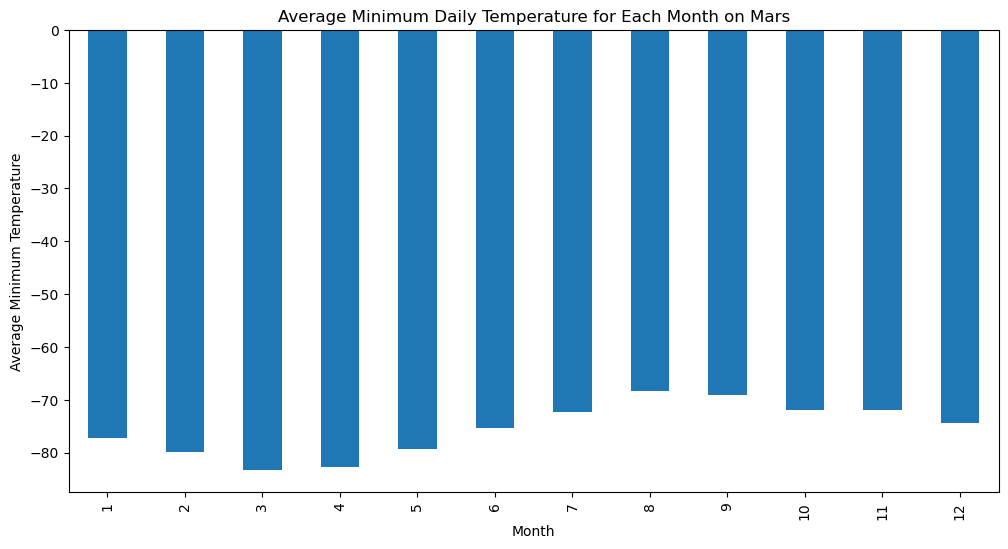

In [13]:
import matplotlib.pyplot as plt

# Calculate the average minimum daily temperature for each month
avg_min_temp = df.groupby('month')['min_temp'].mean()

# Plot the results
avg_min_temp.plot(kind='bar', figsize=(12, 6))

plt.title('Average Minimum Daily Temperature for Each Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.show()



In [14]:
# Identify the coldest month
coldest_month = avg_min_temp.idxmin()
print(f'The coldest month is: {coldest_month}')

# Identify the hottest month
hottest_month = avg_min_temp.idxmax()
print(f'The hottest month is: {hottest_month}')


The coldest month is: 3
The hottest month is: 8


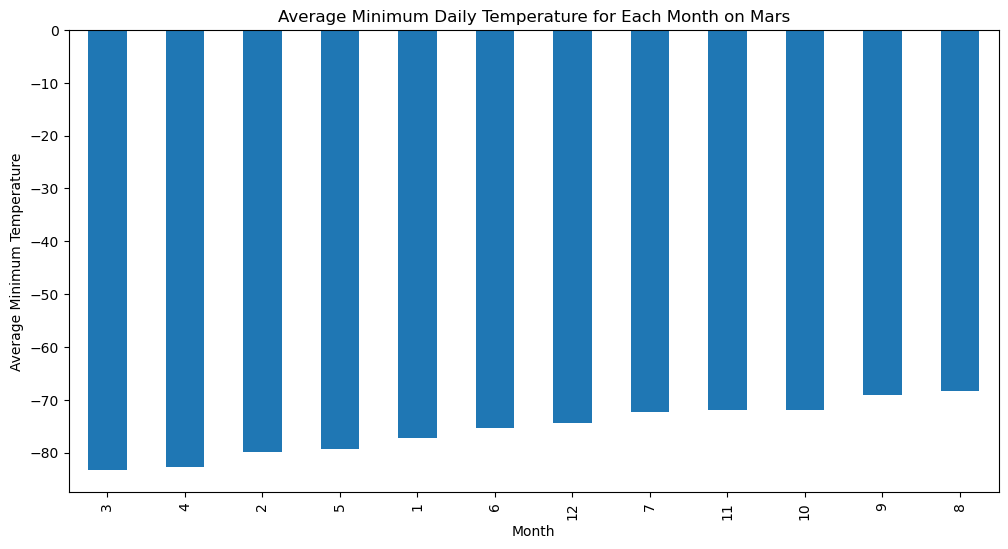

In [15]:
import matplotlib.pyplot as plt

# Sort the average minimum temperature Series in ascending order
sorted_avg_min_temp = avg_min_temp.sort_values()

# Plot the sorted results
sorted_avg_min_temp.plot(kind='bar', figsize=(12, 6))

plt.title('Average Minimum Daily Temperature for Each Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.show()


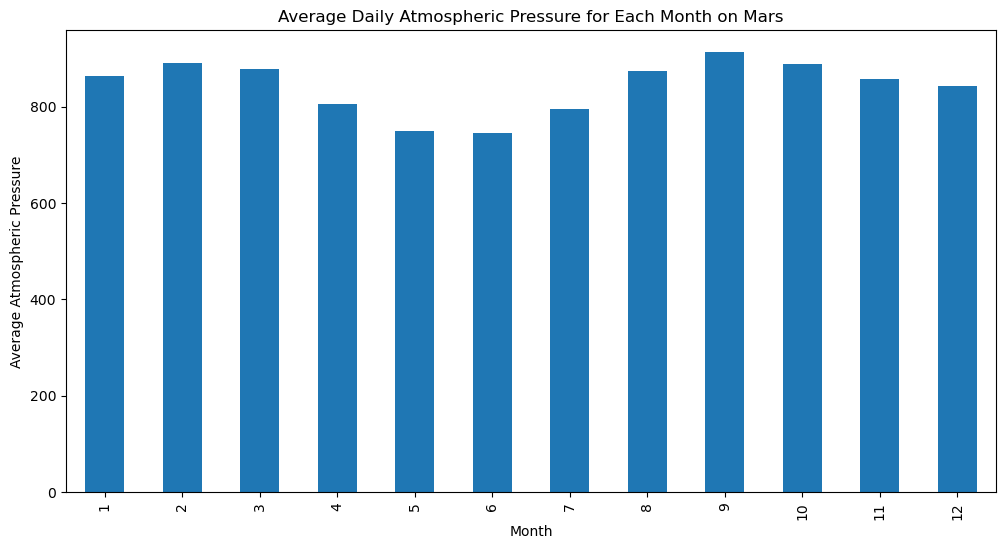

In [16]:
import matplotlib.pyplot as plt

# Calculate the average daily atmospheric pressure for each month
avg_pressure = df.groupby('month')['pressure'].mean()

# Plot the results
avg_pressure.plot(kind='bar', figsize=(12, 6))

plt.title('Average Daily Atmospheric Pressure for Each Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()


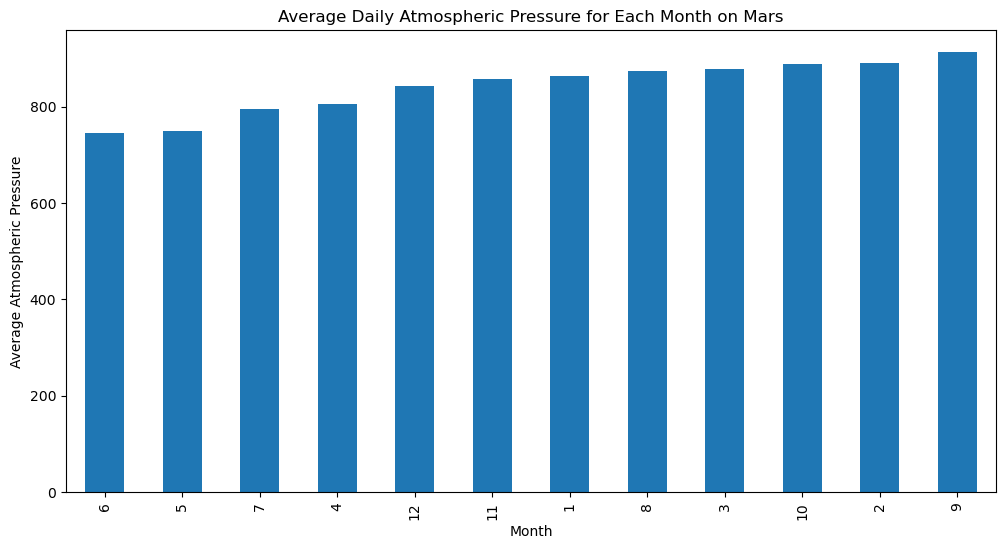

In [17]:
import matplotlib.pyplot as plt

# Calculate the average daily atmospheric pressure for each month
avg_pressure = df.groupby('month')['pressure'].mean()

# Sort the average pressure in ascending order
sorted_avg_pressure = avg_pressure.sort_values()

# Plot the sorted results
sorted_avg_pressure.plot(kind='bar', figsize=(12, 6))

plt.title('Average Daily Atmospheric Pressure for Each Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()


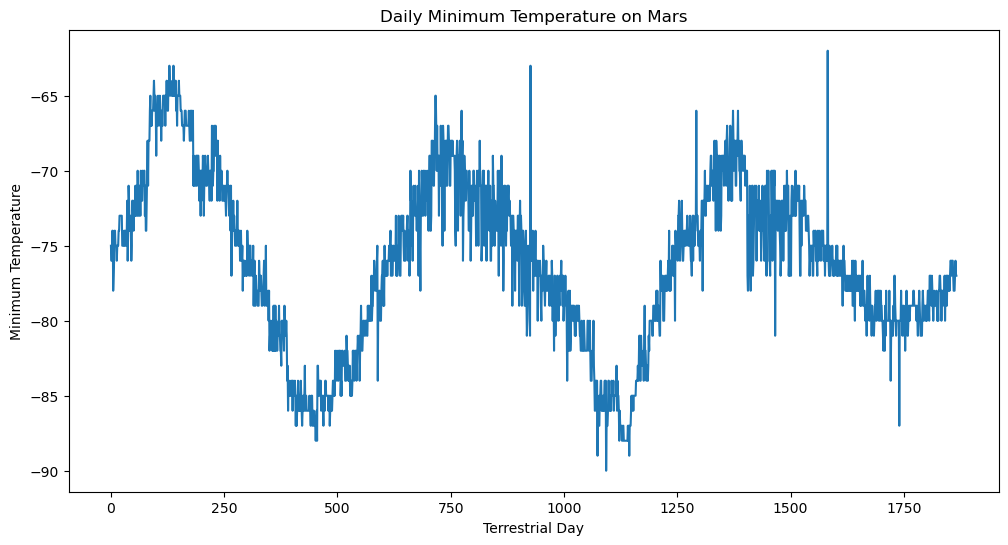

In [18]:
import matplotlib.pyplot as plt

# Plot daily minimum temperature
df['min_temp'].plot(kind='line', figsize=(12, 6))

plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Day')
plt.ylabel('Minimum Temperature')
plt.show()


In [19]:
# Write the DataFrame to a CSV file
df.to_csv('mars_data.csv', index=False)


In [20]:
driver.quit() 